### MM_HW02 B07102052 高維謙

background: It is the assignment of management mathematics course offered by department of information management. The course assignment material is usually not directly related to the course, and students are required to do self-learning to finish the assignment. 

The instructions for this assignment is in the link below:
shorturl.at/boDI1 (`MM_Assignmnet_02_2022.pdf`)


### Preparation
Prepare the required package and the needed parameters.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
N = 2000
mu = 3.5
sd = 0.5

### Q1-a
In this question, we are asked to generate four datasets: 
1. `high school math GPA`: 2.0 - 4.0, continuous
2. `(binary variable)high school calculus status`: 1 -yes, 0-no
3. `(binary variable) ntu precalculus status`: 1-yes, 0-no
4. `ntu calculus 1 gpa`: 0.0, 0.7 - 4.0 in 0.1 increments

In 2, 3, binomial distributions are used, and different probabilities will be applied in 2,3. For instance, in 2, we have to contain the following information. In order to obtain probability, I will first construct a probability array `prob_precalc`, then stuff it into `np.random.binomial()`

```
# simulate previous calculus in high school:
# - 75% of people with HS math GPAs over 3.6 took HS calculus
# - 40% of people with HS math GPAs under 3.6 took HS calculus
# binomial data with 1 trial per student, probabilities as above

```

In 4, generate the dataset by using the below equation, then round to the nearest 0.1 to satisfy the requirement of the question.
\begin{equation}
\text{ntu Calculus I grade}_{i} = 0.3 + 0.7 * \text{HS math GPA}_i + 0.3* \text{HS calculus}_i + 0.1 * \text{ntu precalculus}_i + \epsilon_i \sim Normal(mean = 0, SD = 0.5)
\end{equation}


In [18]:
# preparing hs_math_gpa data
hs_math_gpa = np.random.normal(mu, sd, N)
# truncate
for idx, ele in enumerate(hs_math_gpa):
    if(hs_math_gpa[idx] < 2.0):
        hs_math_gpa[idx] = 2.0
    elif(hs_math_gpa[idx] > 4.0):
        hs_math_gpa[idx] = 4.0
    else:
        continue


# prepare hs_calculus data
prob_hs_calc = []
for i in range(len(hs_math_gpa)):
    if(hs_math_gpa[i] >= 3.6):
        prob_hs_calc.append(0.75)
    else:
        prob_hs_calc.append(0.40)

hs_calculus = np.random.binomial(1, prob_hs_calc, N) 

# prepare ntu_precalc data
prob_precalc = []
for i in range(len(hs_math_gpa)):
    if(hs_calculus[i] == 0): # no high school calculus
        prob_precalc.append(0.7)
    else: # with high school calculus
        if(hs_math_gpa[i] < 3.5):
            prob_precalc.append(0.60)
        else:
            prob_precalc.append(0.25)
ntu_precalc = np.random.binomial(1, prob_precalc, N) 
#print(ntu_precalc)

# prepare NTU calculus 1 GPA data
error = np.random.normal(0, sd, N)
true_beta = {"intercept": 0.3, "hs_math_gpa": 0.7, 
            "hs_calculus": 0.3, "ntu_precalc": 0.1}
ntu_calculus_gpa = true_beta["intercept"] + true_beta["hs_math_gpa"] * hs_math_gpa + true_beta["hs_calculus"]* hs_calculus + \
                    true_beta["ntu_precalc"]*ntu_precalc + error

# round
for i in range(len(ntu_calculus_gpa)):
    ntu_calculus_gpa[i] = round(ntu_calculus_gpa[i], 1)
    if(ntu_calculus_gpa[i] > 4.0):
        ntu_calculus_gpa[i] = 4.0
    elif(ntu_calculus_gpa[i] < 0.7):
        ntu_calculus_gpa[i] = 0.7
    else:
        continue



discussion:

We can draw the graphs about the `ntu calculus I gpa distribution` and `error distribution`. We can see that gpa distributions skew to the left, and error distributions appears approximately normal.

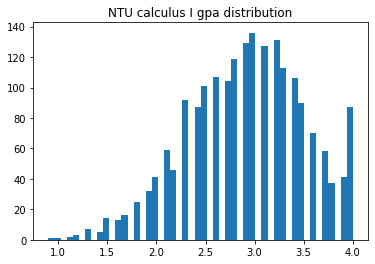

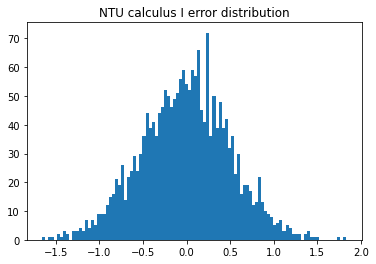

In [19]:
plt.hist(ntu_calculus_gpa, bins = 50)
plt.title("NTU calculus I gpa distribution")
plt.show()

plt.hist(error, bins = 100)
plt.title("NTU calculus I error distribution")
plt.show()

### Q1-b
The question requires us to fit the datasets using multiple regression methods. 

Steps:
1. constructing dataframe using `pd.DataFrame()`
2. use `sm.OLS.from_formula()`  and `model.params` to obtain the coeffecients.

The result is in the second code cell in Q1-b. The coefficient is close to the true value as stated in Q1-a

In [20]:
# construct dataframe
# the result seems to be a little bit weird?
data = {
    "hs_math_gpa": hs_math_gpa,
    "hs_calculus": hs_calculus,
    "ntu_precalc": ntu_precalc,
    "error": error,
    "ntu_calculus_gpa": ntu_calculus_gpa 
}
df = pd.DataFrame(data)
df.head()


,hs_math_gpa,hs_calculus,ntu_precalc,error,ntu_calculus_gpa
0,4.000000,0,1,1.052097,4.0
1,3.305898,1,0,-0.662202,2.3
2,3.745060,1,0,-0.001101,3.2
3,3.711094,1,0,0.245332,3.4
4,3.733717,1,0,0.386334,3.6


In [21]:
model1 = sm.OLS.from_formula('ntu_calculus_gpa~ hs_math_gpa + hs_calculus + ntu_precalc', data = df).fit()
print(model1.params)

Intercept      0.371928
hs_math_gpa    0.672928
hs_calculus    0.286466
ntu_precalc    0.113415
dtype: float64


### Q1-c
We are asked to set up the matrix X and variable y, where
$$
X=
\begin{bmatrix}
1 & x_{11} & x_{12} & x_{13} \\
1 & x_{21} & x_{22} & x_{23} \\
1 & x_{31} & x_{32} & x_{33} \\
...&...    &...     &...     \\
1 & x_{2000,1} & x_{2000,2} & x_{2000,3} \\
\end{bmatrix}
$$

$$
y=
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
...\\
y_{2000}
\end{bmatrix}
$$

Steps:
1. prepare the intercept and the independent variable datasets
2. construct a matrix using `np.vstack()`, then transpose. The result is stored into A
3. stuff ntu calculus gpa dataset into Y variable

In [22]:
# setting up the matrix X
intercept_data = [1]* 2000
X = np.vstack((intercept_data, hs_math_gpa, hs_calculus, ntu_precalc)).T
print(X.shape)
Y = ntu_calculus_gpa # the transpose of the array will not change

(2000, 4)


### Q 1-d
In this question, we have to compute three values: (let C = $ X^T X $). The way to calculate the values are listed below each bullet points.
* $C^{-1}$:
First calculate C using `np.dot()`, then inverse it using `np.linalg.inv()`
* $adj(C)$:
This one is a little bit tricky, because there is no function directly corresponding to adjoint matrix.

We derive the equation as follows:
\begin{equation}
A^{-1} = Adj(A) / det(A)
\end{equation}
\begin{equation}
Adj(A) = (cofactor(A))^T
\end{equation}

\begin{equation}
A^{-1} = (1/det(A)) * (cofactor(A))^T
\end{equation}

\begin{equation}
(cofactor(A))^T = det(A) * A^{-1}
\end{equation}

* det(C): `np.linalg.det()`


discussion:
* about the matrix size: size of  $X^T$:(2000 * 4), $X$: (4* 2000), and the size after multiplication is (4*4), which corresponds to the size in the output cell.


source: 
* How to Find cofactor of a matrix using Numpy
https://www.geeksforgeeks.org/how-to-find-cofactor-of-a-matrix-using-numpy/



In [23]:
# compute matrix quantities (X^T X)^(-1)
C = np.dot(X.T, X)
C_with_inv = np.linalg.inv(C) # with inverse
det_C = np.linalg.det(C)
adj_C = C_with_inv.T * det_C
print("the determinant of C")
print(det_C)
print("_____________________________")
print("the adjoint of C")
print(adj_C)
print("______________________________")
print("inverse of C")
print(C_with_inv)

the determinant of C
140385679387.9601
_____________________________
the adjoint of C
[[ 5.53009727e+09 -1.50599881e+09  2.54431561e+07 -5.08154126e+08]
 [-1.50599881e+09  4.34709504e+08 -7.46152977e+07  8.14027140e+07]
 [ 2.54431561e+07 -7.46152977e+07  3.35495448e+08  9.91708610e+07]
 [-5.08154126e+08  8.14027140e+07  9.91708610e+07  3.35905975e+08]]
______________________________
inverse of C
[[ 0.03939218 -0.01072758  0.00018124 -0.0036197 ]
 [-0.01072758  0.00309654 -0.0005315   0.00057985]
 [ 0.00018124 -0.0005315   0.00238981  0.00070642]
 [-0.0036197   0.00057985  0.00070642  0.00239274]]


### Q1-e
We are aked to compute the following values
* beta:
\begin{equation} 
\hat\beta = (X^TX)^{-1}X^Ty
\end{equation} 

* residuals:
\begin{equation} 
\hat\sigma^2 = \frac{(y-X\hat\beta)^T(y-X\hat\beta)}{(n-p-1)}
\end{equation}

* standard error of the covariance matrix:
\begin{equation}
\hat{var}(\hat\beta) = \hat\sigma^2(X^TX)^{-1}
\end{equation} 

discussion:

The diagonal term of the `var_beta` below corresponds to to the variance of each coefficient. 
$$cov(X, X) = var(x)$$
One can square the diagonal terms to get the standard error of each coefficient.

In [24]:
# calculate beta matrix
mid_prod = np.dot(X.T, Y)
beta_matrix = np.dot(C_with_inv, mid_prod)
print("the result of beta matrix")
print(beta_matrix)
print("--------------------------")

# y - X * beta_matrix
prod1 = (Y - np.dot(X, beta_matrix)).T
prod2 = Y - np.dot(X, beta_matrix)
residual_noise = np.dot(prod1, prod2)/(N - 3 - 1)
print("the result of residual noise:")
print(residual_noise) 
print("----------------------------------")

var_beta = residual_noise *C_with_inv
print("covariance for linear regression coeffecient estimate")
print(var_beta)
print("----------------------------------------------")

# take the square root of var(beta) to get the standard errors for each coefficient
beta_SE = np.diag(var_beta, k = 0) ** 0.5
print("standard error for each coefficient")
print(beta_SE)




the result of beta matrix
[0.371928   0.67292813 0.28646624 0.11341463]
--------------------------
the result of residual noise:
0.24062232200910832
----------------------------------
covariance for linear regression coeffecient estimate
[[ 9.47863666e-03 -2.58129556e-03  4.36097992e-05 -8.70980760e-04]
 [-2.58129556e-03  7.45096015e-04 -1.27891294e-04  1.39524987e-04]
 [ 4.36097992e-05 -1.27891294e-04  5.75042227e-04  1.69979751e-04]
 [-8.70980760e-04  1.39524987e-04  1.69979751e-04  5.75745874e-04]]
----------------------------------------------
standard error for each coefficient
[0.09735829 0.02729645 0.02398004 0.02399471]


### Q1-f
The result is already computed in Q1-e. We can make the following table to compare coefficients, which are shown in the following code cell result.

From the result, we can find that the the value calculated by manual and lm is the same, and are slightly different from the true value because of the error term added into the function ($\epsilon_i \sim Normal(0, 0.5)$)


In [25]:
Truth = [0.3, 0.7, 0.3, 0.1]
Manual = beta_matrix
lm = [i for i in model1.params]
data = {"Truth": Truth, "Manual": Manual, "lm": lm}
df_comp = pd.DataFrame(data, index = ["intercept", "hs_math_gpa", "hs_calculus", "ntu_precalc"])
df_comp

,Truth,Manual,lm
intercept,0.3,0.371928,0.371928
hs_math_gpa,0.7,0.672928,0.672928
hs_calculus,0.3,0.286466,0.286466
ntu_precalc,0.1,0.113415,0.113415


### Q1-g

We are asked to calculate the estimated standard error of parameter estimates. There will be three groups of result: Truth, Manual, and lm. 
* Truth: The true covariance is obtained by altering  $\hat \sigma ^2 $ in formula (3) into $\sigma ^ 2$, and the result is obtained by extracting diagonal elements then take square root.
* Manual: Using the property that $\hat \sigma ^2 $ is the unbiased estimator of $\sigma ^ 2$, we use the `beta_SE` obtained in Q1-e
* lm: the value can be obtained by using `model.bse`

In Q1-h, we will arrange the data into pandas dataframe.



In [26]:
true_cov = pow(sd,2) * C_with_inv
true_SE = np.sqrt(np.diag(true_cov))
print("true standard error")
print(true_SE)
print("-------------------------------------------")

print("standard error of beta by manual calculation")
print(beta_SE)
print("--------------------------------------------")
# https://stackoverflow.com/questions/31523921/print-std-err-value-from-statsmodels-ols-results
# from statsmodels
#print(model1.summary()) # how to extract stndard error?
print("standard error of beta by linear model in python")
model_bse = [i for i in model1.bse]
print(model_bse)


true standard error
[0.09923731 0.02782327 0.02444285 0.0244578 ]
-------------------------------------------
standard error of beta by manual calculation
[0.09735829 0.02729645 0.02398004 0.02399471]
--------------------------------------------
standard error of beta by linear model in python
[0.09735829012102729, 0.027296446926939496, 0.023980038084450057, 0.02399470513339941]


After arranging the data, we can obtain the following table. We can observe that the result of manual calculation is the same as lm function.

In [27]:
error = {"Truth": true_SE, "Manual": beta_SE, "lm": model_bse}
df_error = pd.DataFrame(error, index = ["intercept", "hs_math_gpa", "hs_calculus", "ntu_precalc"])
df_error

,Truth,Manual,lm
intercept,0.099237,0.097358,0.097358
hs_math_gpa,0.027823,0.027296,0.027296
hs_calculus,0.024443,0.023980,0.023980
ntu_precalc,0.024458,0.023995,0.023995


### Q1-h

We are asked to compare the estimated residual variance. The way to calculate the values are listed below:
* True value: 0.5(the standard deviation specified in the question) **  2
* Manual calulation: The formula stated in Q1-e
* lm: `model.mde_resid`

From the table below, we can see that result of Manual calculation and lm is the same.

In [28]:
true_residual_var = sd ** 2
residual_var = residual_noise
lm_residual_var = model1.mse_resid
residual_comp = {"Truth": true_residual_var, "Manual": residual_var, "lm": residual_var}
residual_comp_df = pd.DataFrame(residual_comp, index = ["residual var"])
residual_comp_df

,Truth,Manual,lm
residual var,0.25,0.240622,0.240622


### Q1-i
using the coefficient obtained in Q1-f, we compute the value using the following formula:
$$coeff[0] + coeff[1]* HS\_math\_GPA + coeff[2]*HS\_calc+coeff[3]*NTU\_precalc$$
where `HS_math_GPA`, `HS_calc`, and `NTU_precalc` value are stated in the question. and `coeff` can be replaced as `Truth`, `Manual`, or `lm`

After calculation and some post-processing, one can obtained the table below. From the table, we can see that the value predicted by Manual and lm is the same, and the True value is slightlt higher than the manual and lm value.

In [29]:
# using the coeffiecient in Q1-f
# Truth
HS_math_GPA = 3.123456
HS_calc = 1
NTU_precalc = 0

pred_truth = Truth[0] + Truth[1]* HS_math_GPA + Truth[2] * HS_calc + Truth[3] * NTU_precalc
pred_manual = Manual[0] + Manual[1] * HS_math_GPA + Manual[2] * HS_calc + Manual[3] * NTU_precalc
pred_lm = lm[0] + lm[1] * HS_math_GPA + lm[2] * HS_calc + lm[3] * NTU_precalc

pred_table = pd.DataFrame({"Truth": pred_truth, "Manual": pred_manual, "lm": pred_lm }, index = ["prediction"])
pred_table

,Truth,Manual,lm
prediction,2.786419,2.760256,2.760256
